In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# Data Reading

In [3]:
# Importing all datasets
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.shape

(9240, 37)

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# let's look at the statistical aspects of the dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data Understanding & Cleaning

In [7]:
# Lets check weather prospectID and lead number have duplicate values or not
print(sum(leads.duplicated(subset = ['Lead Number','Prospect ID'])) == 0)

True


In [8]:
#dropping Lead Number and Prospect ID since they have all unique values
leads.drop(['Prospect ID', 'Lead Number'],axis=1, inplace = True)

In [9]:
(leads.isnull().sum()/9240)*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [10]:
# dropping columns with more than 40% of null values
drop_cols=leads.columns

for i in drop_cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 40):
        leads.drop(i, 1, inplace = True)

In [11]:
(leads.isnull().sum()/9240)*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [12]:
# lets analyse country variable
leads['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Canada                     4
South Africa               4
Kuwait                     4
Germany                    4
Nigeria                    4
Sweden                     3
Belgium                    2
Philippines                2
Netherlands                2
Italy                      2
China                      2
Bangladesh                 2
Asia/Pacific Region        2
Uganda                     2
Ghana                      2
Indonesia                  1
Liberia                    1
Kenya                      1
Tanzania                   1
Malaysia                   1
Denmark       

Since, 'India' has majority of value count and other country values are negligible, 'Country' feature can be dropped

In [13]:
leads['City'].value_counts(dropna = False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [14]:
leads['Lead Profile'].value_counts(dropna = False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [15]:
leads['How did you hear about X Education'].value_counts(dropna=False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

Looks like 'City', 'Lead Profile', 'How did you hear about X Education' are the features which has 'select' as garbage value

In [16]:
# Replacing select field with nan since many features have this garbage value
leads = leads.replace('Select', np.nan)

In [17]:
(leads.isnull().sum()/9240)*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

As it can be clearly seen that after replacing the 'select' value, 'How did you hear about X Education' and 'Lead Profile' features have more than 40% of null values. so these features will be dropped

In [18]:
leads['City'].value_counts(dropna = False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [19]:
# Inputing 'Mumbai' to null values
leads['City'] = leads['City'].replace(np.nan,'Mumbai')

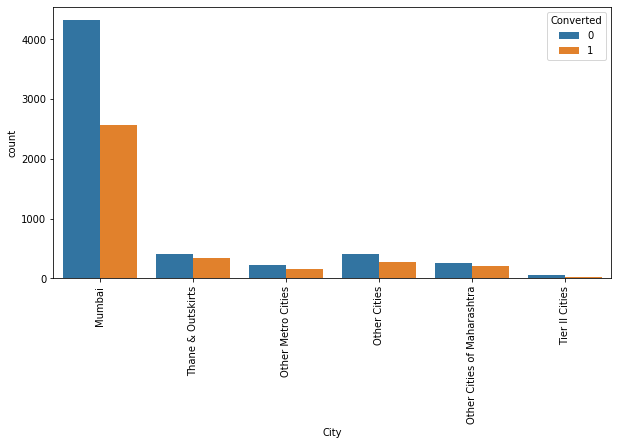

In [20]:
plt.figure(figsize=(10,5))
s1=sns.countplot(leads.City, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [21]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [22]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan,'Unemployed')

Since Occupation is an impoertant feature, it cannot be dropped given that the majority values are 'Unemployed'

In [23]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

It can be seen that if null values are imputed as 'Better Career Prospects' then it won't be a useful feature to build the model on. so it can be dropped.  

In [24]:
leads['Tags'].value_counts(dropna=False)  

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [25]:
leads['Tags']=leads['Tags'].replace(np.nan,'Unknown')
leads['Tags']=leads['Tags'].replace(['Recognition issue (DEC approval)','Shall take in the next coming month',
                                     'University not recognized','Lateral student','In confusion whether part time or DLP',
                                     'Interested in Next batch','Still Thinking','Want to take admission but has financial problems',
                                     'Lost to Others','in touch with EINS','invalid number','Diploma holder (Not Eligible)',
                                    'wrong number given','opp hangup','number not provided','Graduation in progress',
                                    'switched off','Not doing further education','Lost to EINS','Interested  in full time MBA',
                                     'Already a student'],'Other')


In [26]:
leads['Tags'].value_counts(dropna=False)  

Unknown                                3353
Will revert after reading the email    2072
Other                                  1555
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Name: Tags, dtype: int64

In [27]:
leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [28]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Unknown')
leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                          'Healthcare Management','Hospitality Management',
                                                           'Retail Management'],'Management')

In [29]:
leads['Specialization'].value_counts(dropna=False)

Management                           4253
Unknown                              3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [30]:
# dropping Columns
drop_col = ['Country','Lead Profile','How did you hear about X Education','What matters most to you in choosing a course']
leads.drop(drop_col,axis=1,inplace=True)

In [31]:
# Checking null Percentage
(leads.isnull().sum()/9240)*100

Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.

In [32]:
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
blog                    1
NC_EDM                  1
testone                 1
youtubechannel          1
Pay per Click Ads       1
WeLearn                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [33]:
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'other')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Live Chat','Press_Release','youtubechannel','testone',
                                                     'Pay per Click Ads','NC_EDM','WeLearn','blog','welearnblog_Home'],'other')

In [34]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [35]:
leads['Last Activity']=leads['Last Activity'].replace(np.nan,'Other')
leads['Last Activity']=leads['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation',
                                                      'Approached upfront','View in browser link Clicked','Email Received',
                                                      'Email Marked Spam','Resubscribed to emails','Visited Booth in Tradeshow'],'Other')

In [36]:
leads=leads.dropna()

In [37]:
(leads.isnull().sum()/9240)*100

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

Now all Data is cleaned and imputed properly!! Now, lets check data for imbalance

In [38]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9103 non-null   object 
 1   Lead Source                               9103 non-null   object 
 2   Do Not Email                              9103 non-null   object 
 3   Do Not Call                               9103 non-null   object 
 4   Converted                                 9103 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9103 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9103 non-null   object 
 9   Specialization                            9103 non-null   object 
 10  What is your current occupation     

In [39]:
leads['Do Not Email'].value_counts()

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [40]:
leads['Do Not Call'].value_counts()

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [41]:
leads['Search'].value_counts()

No     9089
Yes      14
Name: Search, dtype: int64

In [42]:
leads['Magazine'].value_counts()

No    9103
Name: Magazine, dtype: int64

In [43]:
leads['Newspaper Article'].value_counts()

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [44]:
leads['X Education Forums'].value_counts()

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [45]:
leads['Newspaper'].value_counts()

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [46]:
leads['Digital Advertisement'].value_counts()

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [47]:
leads['Through Recommendations'].value_counts()

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [48]:
leads['Receive More Updates About Our Courses'].value_counts()

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [49]:
leads['Update me on Supply Chain Content'].value_counts()

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [50]:
leads['Get updates on DM Content'].value_counts()

No    9103
Name: Get updates on DM Content, dtype: int64

In [51]:
leads['I agree to pay the amount through cheque'].value_counts()

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

All Features have data imbalance. Hence, they should be dropped.

In [52]:
leads['A free copy of Mastering The Interview'].value_counts()

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [53]:
leads['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Form Submitted on Website          1
Approached upfront                 1
Email Received                     1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

In [54]:
leads['Last Notable Activity']=leads['Last Notable Activity'].replace(['Email Received','View in browser link Clicked',
                                                                      'Approached upfront','Resubscribed to emails',
                                                                      'Form Submitted on Website','Email Marked Spam',
                                                                      'Had a Phone Conversation','Unreachable','Unsubscribed',
                                                                      'Email Bounced','Email Link Clicked'],'Other')

In [55]:
# Dropping columns with data imbalance
data_imbalance_col = ['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                      'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
leads.drop(data_imbalance_col,axis=1,inplace=True)

In [56]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

In [57]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

# Checking for Outliers

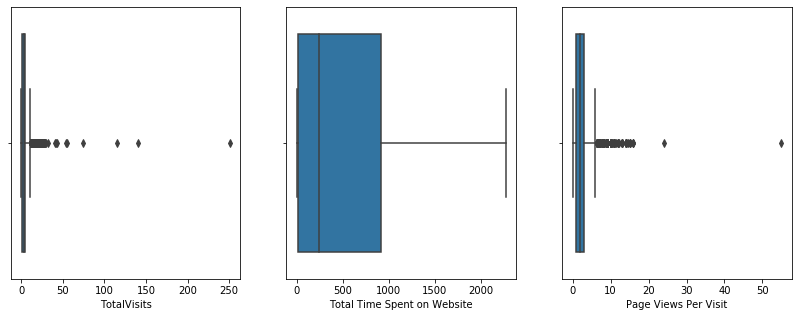

In [58]:
# Numerical Columns
num_col = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.boxplot(x='TotalVisits', data=leads, hue=leads.Converted)
plt.subplot(1,3,2)
sns.boxplot(x='Total Time Spent on Website', data=leads, hue=leads.Converted)
plt.subplot(1,3,3)
sns.boxplot(x='Page Views Per Visit', data=leads, hue=leads.Converted)
plt.show()


'TotalVisits' and 'Page Views Per Visit' are the features with outliers, where some values in both the features are in clusters. While few of the values are very high. This requires treatment.  

In [59]:
leads[num_col].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,3.445238,481.350104,2.362820,0.380204
std,4.854853,545.066142,2.161418,0.485464
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000,0.000000
50%,3.000000,244.000000,2.000000,0.000000
75%,5.000000,919.500000,3.000000,1.000000
max,251.000000,2272.000000,55.000000,1.000000


clearly there is a very high difference in 75% value and max value for 'TotalVisits' and 'Page Views Per Visit' features. hence this requires dropping those records

In [60]:
# removing outliers for totalVisits
Q1 = leads['TotalVisits'].quantile(0.05)
Q3 = leads['TotalVisits'].quantile(0.95)
IQR = Q3 - Q1
leads = leads[(leads['TotalVisits'] >= Q1 - 1.5*IQR) & (leads['TotalVisits'] <= Q3 + 1.5*IQR)]

# removing outliers for Page Views Per Visit
Q1 = leads['Page Views Per Visit'].quantile(0.05)
Q3 = leads['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
leads = leads[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

In [61]:
leads[num_col].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
count,9077.000000,9077.000000,9077.000000,9077.000000
mean,3.317285,481.452462,2.343201,0.380522
std,3.292020,545.340543,2.051961,0.485542
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,8.000000,1.000000,0.000000
50%,3.000000,244.000000,2.000000,0.000000
75%,5.000000,920.000000,3.000000,1.000000
max,25.000000,2272.000000,15.000000,1.000000


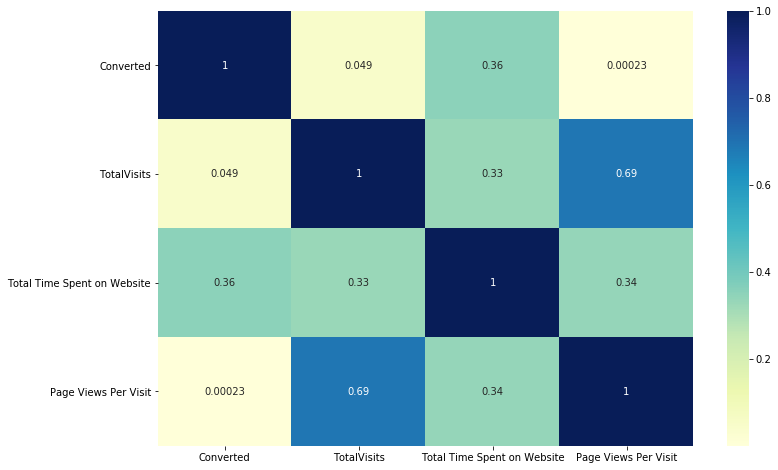

In [62]:
plt.figure(figsize=(12,8))
sns.heatmap(leads.corr(),annot=True, cmap='YlGnBu')
plt.show()

In [63]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9077 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9077 non-null   object 
 1   Lead Source                             9077 non-null   object 
 2   Do Not Email                            9077 non-null   object 
 3   Converted                               9077 non-null   int64  
 4   TotalVisits                             9077 non-null   float64
 5   Total Time Spent on Website             9077 non-null   int64  
 6   Page Views Per Visit                    9077 non-null   float64
 7   Last Activity                           9077 non-null   object 
 8   Specialization                          9077 non-null   object 
 9   What is your current occupation         9077 non-null   object 
 10  Tags                                    9077 non-null   obje

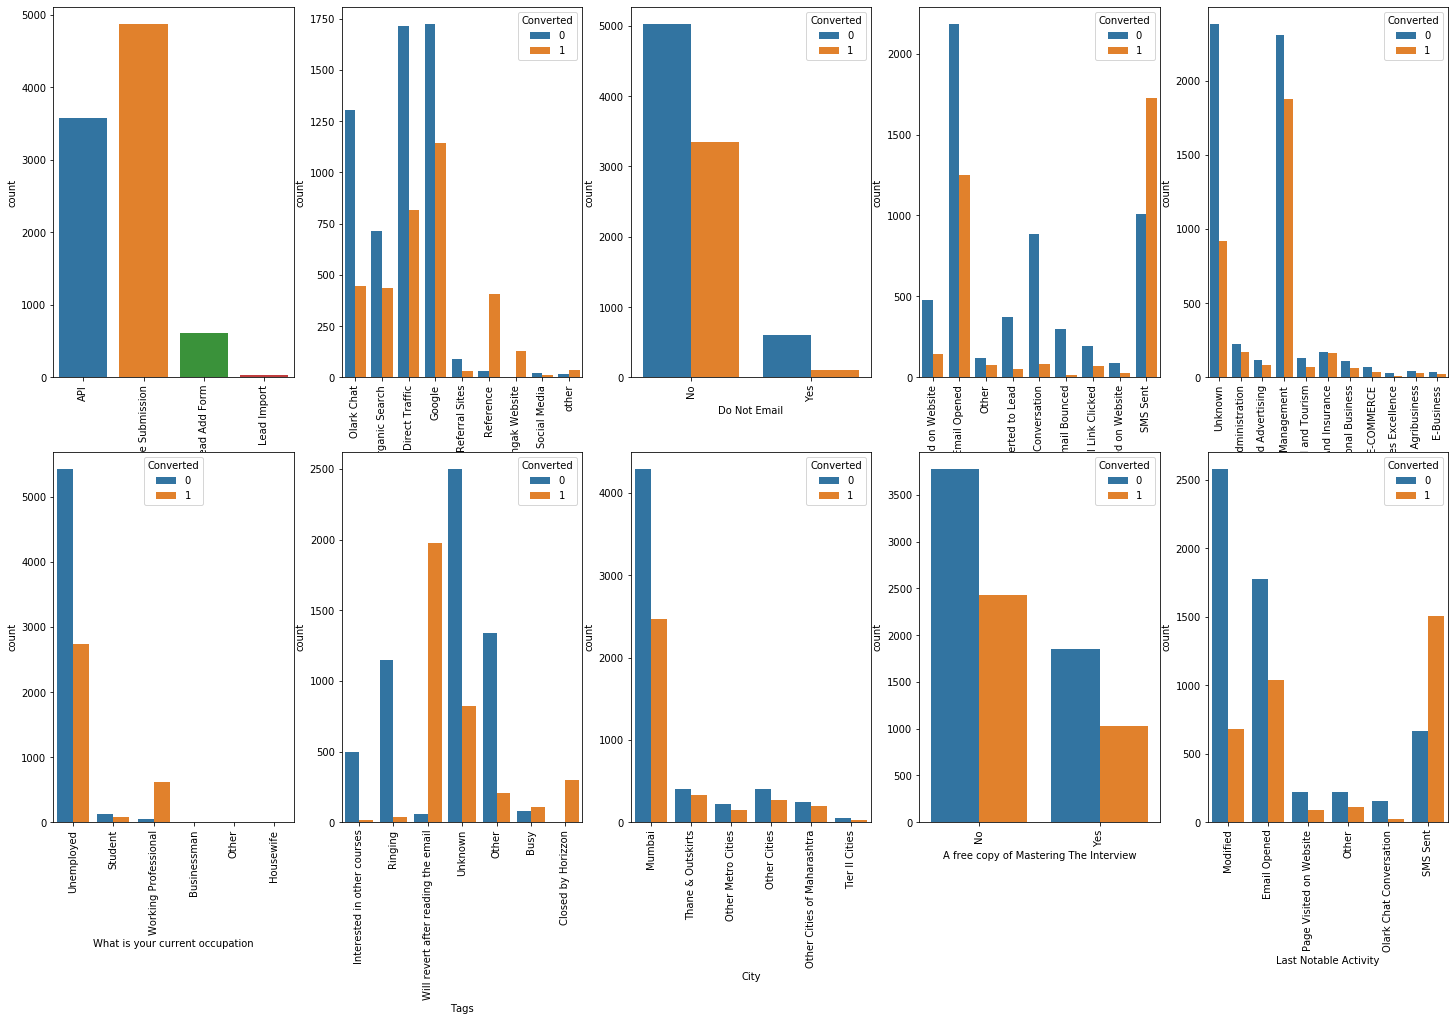

In [64]:
categorical_col = ['Lead Origin','Lead Source','Do Not Email','Last Activity','Specialization','What is your current occupation','Tags','City','A free copy of Mastering The Interview','Last Notable Activity']
plt.figure(figsize=(25,15))
plt.subplot(2,5,1)
s1=sns.countplot(x='Lead Origin', data=leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.subplot(2,5,2)
s2=sns.countplot(x='Lead Source', data=leads, hue=leads.Converted)
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
plt.subplot(2,5,3)
s3=sns.countplot(x='Do Not Email', data=leads, hue=leads.Converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.subplot(2,5,4)
s4=sns.countplot(x='Last Activity', data=leads, hue=leads.Converted)
s4.set_xticklabels(s4.get_xticklabels(),rotation=90)
plt.subplot(2,5,5)
s5=sns.countplot(x='Specialization', data=leads, hue=leads.Converted)
s5.set_xticklabels(s5.get_xticklabels(),rotation=90)
plt.subplot(2,5,6)
s6=sns.countplot(x='What is your current occupation', data=leads, hue=leads.Converted)
s6.set_xticklabels(s6.get_xticklabels(),rotation=90)
plt.subplot(2,5,7)
s7=sns.countplot(x='Tags', data=leads, hue=leads.Converted)
s7.set_xticklabels(s7.get_xticklabels(),rotation=90)
plt.subplot(2,5,8)
s8=sns.countplot(x='City', data=leads, hue=leads.Converted)
s8.set_xticklabels(s8.get_xticklabels(),rotation=90)
plt.subplot(2,5,9)
s9=sns.countplot(x='A free copy of Mastering The Interview', data=leads, hue=leads.Converted)
s9.set_xticklabels(s9.get_xticklabels(),rotation=90)
plt.subplot(2,5,10)
s10=sns.countplot(x='Last Notable Activity', data=leads, hue=leads.Converted)
s10.set_xticklabels(s10.get_xticklabels(),rotation=90)
plt.show()

In [65]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
leads[['A free copy of Mastering The Interview','Do Not Email']]=leads[['A free copy of Mastering The Interview','Do Not Email']].apply(binary_map)

Dummy Variable Creation

In [66]:
leads = leads.rename(columns={'What is your current occupation': 'Current Occupation'})
dummy_var = ['Lead Origin','Lead Source','Last Activity','Specialization','Current Occupation','Tags','City','Last Notable Activity']

# Creating dummy variables for the variable 'Lead Origin'
ml = pd.get_dummies(leads['Lead Origin'], prefix='Lead Origin')
#Adding the results to the master dataframe
leads = pd.concat([leads,ml], axis=1)

# Creating dummy variables for the variable 'Lead Source'
ml = pd.get_dummies(leads['Lead Source'], prefix='Lead Source')
#Adding the results to the master dataframe
leads = pd.concat([leads,ml], axis=1)

# Creating dummy variables for the variable 'Last Activity'
ml = pd.get_dummies(leads['Last Activity'], prefix='Last Activity')
#Adding the results to the master dataframe
leads = pd.concat([leads,ml], axis=1)

# Creating dummy variables for the variable 'Lead Origin'
ml = pd.get_dummies(leads['Specialization'], prefix='Specialization')
#Adding the results to the master dataframe
leads = pd.concat([leads,ml], axis=1)

# Creating dummy variables for the variable 'Lead Origin'
ml = pd.get_dummies(leads['Current Occupation'], prefix='Current Occupation')
#Adding the results to the master dataframe
leads = pd.concat([leads,ml], axis=1)

# Creating dummy variables for the variable 'Lead Origin'
ml = pd.get_dummies(leads['Tags'], prefix='Tags')
#Adding the results to the master dataframe
leads = pd.concat([leads,ml], axis=1)

# Creating dummy variables for the variable 'Lead Origin'
ml = pd.get_dummies(leads['City'], prefix='City')
#Adding the results to the master dataframe
leads = pd.concat([leads,ml], axis=1)

# Creating dummy variables for the variable 'Lead Origin'
ml = pd.get_dummies(leads['Last Notable Activity'], prefix='Last Notable Activity')
#Adding the results to the master dataframe
leads = pd.concat([leads,ml], axis=1)

leads.drop(dummy_var,axis=1,inplace=True)

In [67]:
leads.columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Lead Source_other',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Admini

Clearly All the "Other" imputed categories are not required adn can be dropped..

In [68]:
leads.drop(['Lead Source_other','Last Activity_Other','Specialization_Unknown','Current Occupation_Other','Tags_Other','Last Notable Activity_Other'],axis=1,inplace=True)

In [69]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1.0,305,1.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,2.0,1428,1.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


# Model Building

In [70]:
# test-train split
y = leads['Converted']
X=leads.drop('Converted', axis=1)

In [71]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [72]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,2.0,1532,2.0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,2.0,1428,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [73]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

In [74]:
# Feature Scaling
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
347,0,-0.402507,-0.804700,-0.167823,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7312,1,-1.005790,-0.883895,-1.143622,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6970,0,-0.402507,0.937612,-0.167823,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2366,0,1.708983,0.020412,1.051926,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
9203,0,1.407342,1.643008,0.807976,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [75]:
# Conversion Rate
(sum(leads['Converted'])/len(leads['Converted'].index))*100

38.05221989644156

In [76]:
# checking correlation
leads.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
Do Not Email,1.000000,-0.135445,-0.003051,-0.048318,0.018198,0.054410,-0.082971,0.093745,-0.020882,-0.017105,...,0.010510,-0.005836,0.039678,-0.007677,0.046325,-0.189136,0.119830,-0.012796,0.041945,-0.024652
Converted,-0.135445,1.000000,0.048948,0.355315,0.000231,-0.032681,-0.115001,-0.039413,0.306140,-0.010876,...,0.012426,0.028646,0.011990,0.042146,-0.007971,-0.015421,-0.264320,-0.072062,-0.034935,0.362443
TotalVisits,-0.003051,0.048948,1.000000,0.330813,0.690456,0.278326,-0.278439,0.404272,-0.249810,-0.054403,...,0.077732,0.053648,0.071688,0.086219,0.021036,0.067390,-0.144090,-0.050019,0.223269,0.010239
Total Time Spent on Website,-0.048318,0.355315,0.330813,1.000000,0.338246,0.180437,-0.196092,0.295495,-0.194398,-0.051422,...,0.056806,0.069498,0.050652,0.077536,0.022169,0.017764,-0.125491,-0.050483,0.029755,0.133425
Page Views Per Visit,0.018198,0.000231,0.690456,0.338246,1.000000,0.286931,-0.365898,0.509580,-0.287806,-0.059490,...,0.090090,0.087488,0.100894,0.090229,0.032842,0.073978,-0.106650,-0.091396,0.024176,0.062448
A free copy of Mastering The Interview,0.054410,-0.032681,0.278326,0.180437,0.286931,1.000000,-0.487492,0.565466,-0.166150,-0.039857,...,0.185304,0.112560,0.173994,0.045839,0.072586,0.053467,-0.073482,-0.058909,0.033657,0.024256
Lead Origin_API,-0.082971,-0.115001,-0.278439,-0.196092,-0.365898,-0.487492,1.000000,-0.866105,-0.215690,-0.047166,...,-0.154919,-0.146639,-0.138336,-0.157408,-0.073047,-0.056245,0.122842,0.134714,-0.031072,-0.111653
Lead Origin_Landing Page Submission,0.093745,-0.039413,0.404272,0.295495,0.509580,0.565466,-0.866105,1.000000,-0.287770,-0.062928,...,0.174963,0.153211,0.160433,0.154160,0.081882,0.061440,-0.082952,-0.118044,0.039915,0.050089
Lead Origin_Lead Add Form,-0.020882,0.306140,-0.249810,-0.194398,-0.287806,-0.166150,-0.215690,-0.287770,1.000000,-0.015671,...,-0.047461,-0.040450,-0.049095,0.000938,-0.019366,-0.023486,-0.072683,-0.025848,-0.016343,0.125000
Lead Origin_Lead Import,-0.017105,-0.010876,-0.054403,-0.051422,-0.059490,-0.039857,-0.047166,-0.062928,-0.015671,1.000000,...,0.004944,0.091530,-0.002721,-0.003617,-0.005307,0.046374,-0.008411,-0.008397,-0.011008,-0.028385


Looks like there aren't any features which are highly correlated

Running First Training Model

In [77]:
# Logistic regression model
X_train_sm =  sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7261
Model:                            GLM   Df Residuals:                     7205
Model Family:                Binomial   Df Model:                           55
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 12 Oct 2021   Deviance:                          nan
Time:                        18:03:20   Pearson chi2:                 5.87e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             1.319e+14   1.76e+07   7.47e+06      0.000    1.32e+14    1.32e+14
Do Not Email                                     -5.735e+14   3.92e+06  -1.46e+08      0.000   -5.74e+14   -5.74e+14
TotalVisits                                       1.276e+14   1.19e+06   1.07e+08      0.000    1.28e+14    1.28e+14
Total Time Spent on Website                       4.641e+14   9.54e+05   4.86e+08      0.000    4.64e+14    4.64e+14
Page Views Per Visit                             -1.259e+14   1.28e+06  -9.81e+07      0.000   -1.26e+14   -1.26e+14
A free copy of Mastering The Interview           -4.903e+12    2.5e+06  -1.96e+06      0.000    -4.9e+12    -4.9e+12
Lead Origin_API                                  -8.549e+13   1.11e+07   -7.7e+06      0.000   -8.55e+13   -8.55e+13
Lead Origin_Landing Page Submission              -3.008e+14   1.12e+07  -2.69e+07      0.000   -3.01e+14   -3.01e+14
Lead Origin_Lead Add Form                         9.966e+14   1.56e+07   6.37e+07      0.000    9.97e+14    9.97e+14
Lead Origin_Lead Import                          -4.784e+14   2.83e+07  -1.69e+07      0.000   -4.78e+14   -4.78e+14
Lead Source_Direct Traffic                       -2.729e+14   1.66e+07  -1.64e+07      0.000   -2.73e+14   -2.73e+14
Lead Source_Google                                -1.39e+14   1.66e+07  -8.38e+06      0.000   -1.39e+14   -1.39e+14
Lead Source_Olark Chat                            3.172e+14   1.68e+07   1.89e+07      0.000    3.17e+14    3.17e+14
Lead Source_Organic Search                       -2.131e+14   1.67e+07  -1.27e+07      0.000   -2.13e+14   -2.13e+14
Lead Source_Reference                            -6.387e+14   1.39e+07  -4.61e+07      0.000   -6.39e+14   -6.39e+14
Lead Source_Referral Sites                       -2.421e+14    1.8e+07  -1.34e+07      0.000   -2.42e+14   -2.42e+14
Lead Source_Social Media                          5.963e+14   3.61e+07   1.65e+07      0.000    5.96e+14    5.96e+14
Lead Source_Welingak Website                      -4.11e+14   1.47e+07  -2.79e+07      0.000   -4.11e+14   -4.11e+14
Last Activity_Converted to Lead                  -7.182e+14   7.38e+06  -9.73e+07      0.000   -7.18e+14   -7.18e+14
Last Activity_Email Bounced                      -4.289e+14    7.6e+06  -5.64e+07      0.000   -4.29e+14   -4.29e+14
Last Activity_Email Link Clicked                 -4.964e+14   7.41e+06   -6.7e+07      0.000   -4.96e+14   -4.96e+14
Last Activity_Email Opened                       -2.068e+14   7.04e+06  -2.94e+07      0.000   -2.07e+14   -2.07e+14
Last Activity_Form Submitted on Website          -4.169e+14   9.61e+06  -4.34e+07      0.000   -4.17e+14   -4.17e+14
Last Activity_Olark Chat Conversation    

In [78]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [79]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 26),
 ('A free copy of Mastering The Interview', False, 42),
 ('Lead Origin_API', False, 4),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 39),
 ('Lead Source_Direct Traffic', False, 19),
 ('Lead Source_Google', False, 20),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 17),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Social Media', False, 18),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 8),
 ('Last Activity_Email Opened', False, 27),
 ('Last Activity_Form Submitted on Website', False, 33),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_

In [80]:
col = X_train.columns[rfe.support_]

In [81]:
# Displaying the top 15 columns
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Current Occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [82]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7261
Model:                            GLM   Df Residuals:                     7245
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1731.5
Date:                Tue, 12 Oct 2021   Deviance:                       3463.1
Time:                        18:03:23   Pearson chi2:                 8.29e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.0059      0.074    -27.278      0.000      -2.150      -1.862
Do Not Email                                -1.2135      0.228     -5.330      0.000      -1.660      -0.767
Total Time Spent on Website                  1.0980      0.050     21.786      0.000       0.999       1.197
Lead Origin_Lead Add Form                    2.5990      0.339      7.666      0.000       1.934       3.263
Lead Source_Olark Chat                       1.4958      0.127     11.766      0.000       1.247       1.745
Lead Source_Welingak Website                 3.7020      0.802      4.614      0.000       2.130       5.275
Last Activity_Converted to Lead             -1.0047      0.263     -3.813      0.000      -1.521      -0.488
Last Activity_Email Bounced                 -0.9140      0.470     -1.945      0.052      -1.835       0.007
Last Activity_Olark Chat Conversation       -1.4672      0.189     -7.747      0.000      -1.838      -1.096
Current Occupation_Working Professional      1.1923      0.303      3.930      0.000       0.598       1.787
Tags_Busy                                    0.9125      0.210      4.353      0.000       0.502       1.323
Tags_Closed by Horizzon                      5.9103      0.722      8.189      0.000       4.496       7.325
Tags_Interested in other courses            -2.2418      0.367     -6.103      0.000      -2.962      -1.522
Tags_Ringing                                -3.1352      0.223    -14.064      0.000      -3.572      -2.698
Tags_Will revert after reading the email     4.4753      0.173     25.942      0.000       4.137       4.813
Last Notable Activity_SMS Sent               1.9742      0.107     18.383      0.000       1.764       2.185
============================================================================================================
"""

Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [83]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.82
13,Tags_Will revert after reading the email,1.77
0,Do Not Email,1.74
6,Last Activity_Email Bounced,1.71
3,Lead Source_Olark Chat,1.60
14,Last Notable Activity_SMS Sent,1.50
1,Total Time Spent on Website,1.42
7,Last Activity_Olark Chat Conversation,1.38
4,Lead Source_Welingak Website,1.35
8,Current Occupation_Working Professional,1.33


Looks like all features have very low VIF values as per our assumption i.e. 5 being high and 10 being very high. Hence there is no need to drop any of the features

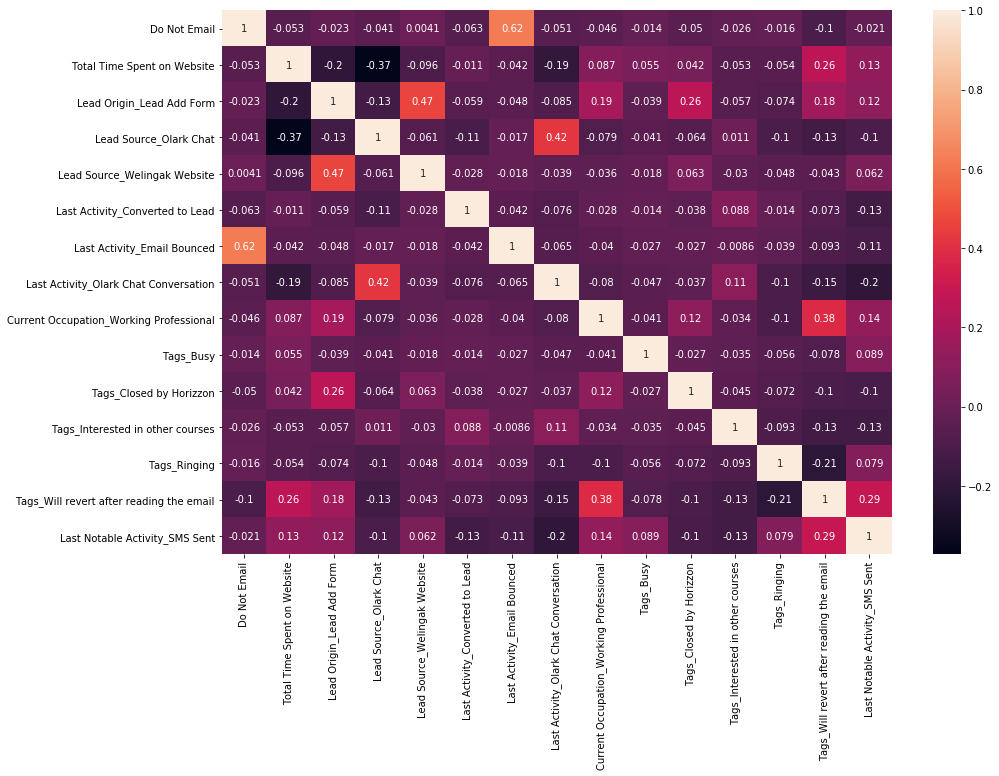

In [84]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train[col].corr(),annot=True)
plt.show()

In [85]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

347     0.005874
7312    0.026387
6970    0.273600
2366    0.005948
9203    0.986257
1899    0.999234
7485    0.061825
161     0.998727
4754    0.026387
8895    0.993097
dtype: float64

In [86]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.005874  , 0.02638712, 0.27360049, 0.00594781, 0.98625655,
       0.99923418, 0.06182477, 0.99872692, 0.02638712, 0.99309685])

In [87]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Pred':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Pred,Prospect ID
0,0,0.005874,347
1,0,0.026387,7312
2,0,0.273600,6970
3,0,0.005948,2366
4,1,0.986257,9203


In [88]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Pred.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Pred,Prospect ID,predicted
0,0,0.005874,347,0
1,0,0.026387,7312,0
2,0,0.273600,6970,0
3,0,0.005948,2366,0
4,1,0.986257,9203,1


In [89]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[4264  203]
 [ 463 2331]]


In [90]:
# Predicted     not_Converted    Converted
# Actual
# not_Converted        4264            203
# Converted            463             2331  

In [91]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.90827709681862


## Metrics beyond simply accuracy

In [92]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [93]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8342877594846099

In [94]:
# Let us calculate specificity
TN / float(TN+FP)

0.9545556301768525

In [95]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.04544436982314753


In [96]:
# positive predictive value 
print (TP / float(TP+FP))

0.919889502762431


In [97]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9020520414639306


###  Plotting the ROC Curve

In [98]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [99]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Pred, drop_intermediate = False )

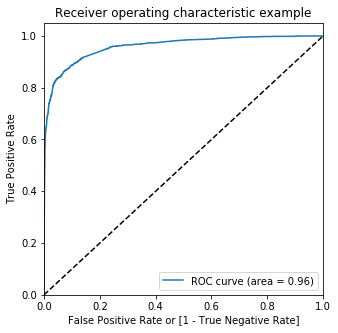

In [100]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Pred)

### Finding Optimal Cutoff Point

In [101]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Pred.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Pred,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.005874,347,0,1,0,0,0,0,0,0,0,0,0
1,0,0.026387,7312,0,1,0,0,0,0,0,0,0,0,0
2,0,0.273600,6970,0,1,1,1,0,0,0,0,0,0,0
3,0,0.005948,2366,0,1,0,0,0,0,0,0,0,0,0
4,1,0.986257,9203,1,1,1,1,1,1,1,1,1,1,1


In [102]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384795  1.000000  0.000000
0.1   0.1  0.809117  0.964567  0.711887
0.2   0.2  0.882248  0.916249  0.860981
0.3   0.3  0.893403  0.892269  0.894112
0.4   0.4  0.903319  0.861131  0.929707
0.5   0.5  0.908277  0.834288  0.954556
0.6   0.6  0.905936  0.809592  0.966197
0.7   0.7  0.892164  0.755906  0.977390
0.8   0.8  0.886379  0.731926  0.982986
0.9   0.9  0.865170  0.664281  0.990822


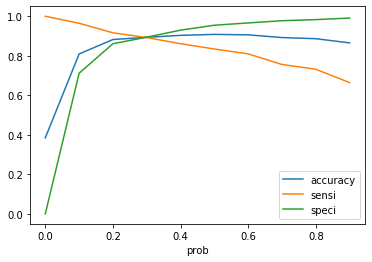

In [103]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [104]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Pred.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Pred,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.005874,347,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.026387,7312,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.273600,6970,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.005948,2366,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.986257,9203,1,1,1,1,1,1,1,1,1,1,1,1


In [105]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8934031125189368

In [106]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3994,  473],
       [ 301, 2493]], dtype=int64)

In [107]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [108]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.89226914817466

In [109]:
# Let us calculate specificity
TN / float(TN+FP)

0.8941123796731587

Observation:So as we can see above the model seems to be performing well. The ROC curve has AUC of 0.96, which is good. We have the following values for the Train Data:

<div>Accuracy : 89.34%</div>
<div>Sensitivity : 89.22%</div>
<div>Specificity : 89.41%</div>

In [110]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10588762032684128


In [111]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8405259608900877


In [112]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9299185098952271


In [113]:
# Precision
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.8405259608900877

In [114]:
# Recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.89226914817466

### Precision and recall tradeoff

In [115]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 7256    0
 7257    1
 7258    1
 7259    0
 7260    0
 Name: Converted, Length: 7261, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 7256    0
 7257    1
 7258    1
 7259    0
 7260    0
 Name: predicted, Length: 7261, dtype: int64)

In [116]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Pred)

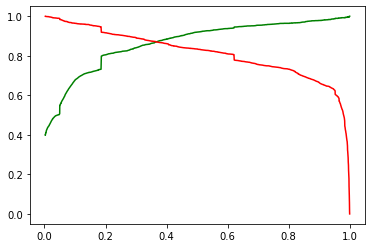

In [117]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###  Making predictions on the test set

In [118]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [119]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Current Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
1342,0,-0.806541,0,0,0,1,0,0,0,0,0,0,1,0,0
8169,0,-0.578162,0,0,0,0,0,0,0,0,0,0,1,0,1
1632,0,0.409025,0,0,0,0,0,1,0,0,0,1,0,0,0
2743,0,-0.596580,0,0,0,0,0,0,0,0,0,0,1,0,0
6133,0,-0.883895,0,1,0,0,0,1,0,0,0,0,0,0,0


In [120]:
X_test_sm = sm.add_constant(X_test)

In [121]:
y_test_pred = res.predict(X_test_sm)

In [122]:
y_test_pred[:10]

1342    0.000883
8169    0.021843
1632    0.005139
2743    0.003030
6133    0.049840
9057    0.057734
2736    0.002221
1196    0.005188
2363    0.003662
3128    0.019718
dtype: float64

In [123]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1['Prospect ID'] = y_pred_1.index

In [124]:
# Let's see the head
y_pred_1.head()

,0,Prospect ID
1342,0.000883,1342
8169,0.021843,8169
1632,0.005139,1632
2743,0.003030,2743
6133,0.049840,6133


In [139]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

,Converted
1342,1
8169,0
1632,0
2743,0
6133,0


In [126]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [127]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [128]:
y_pred_final.head()

,Converted,0,Prospect ID
0,1,0.000883,1342
1,0,0.021843,8169
2,0,0.005139,1632
3,0,0.003030,2743
4,0,0.049840,6133


In [129]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_pred'})

In [130]:
y_pred_final['final_predicted'] = y_pred_final.Converted_pred.map(lambda x: 1 if x > 0.38 else 0)
y_pred_final.head()

,Converted,Converted_pred,Prospect ID,final_predicted
0,1,0.000883,1342,0
1,0,0.021843,8169,0
2,0,0.005139,1632,0
3,0,0.003030,2743,0
4,0,0.049840,6133,0


In [131]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_pred.map( lambda x: round(x*100))
y_pred_final.head()

,Converted,Converted_pred,Prospect ID,final_predicted,Lead_Score
0,1,0.000883,1342,0,0
1,0,0.021843,8169,0,2
2,0,0.005139,1632,0,1
3,0,0.003030,2743,0,0
4,0,0.049840,6133,0,5


Here, Lead Score is the new feature created which will calculate the score and will help us know what are the chances of a lead to get converted

In [132]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9036343612334802

In [133]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1072,   84],
       [  91,  569]], dtype=int64)

In [134]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [135]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8621212121212121

In [136]:
# Let us calculate specificity
TN / float(TN+FP)

0.9273356401384083

Observation:
After running the model on the Test Data these are the figures we obtain:

<div>Accuracy : 90.36%</div>
<div>Sensitivity : 86.21%</div>
<div>Specificity : 92.73%</div>

In [137]:
# Precision
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.8713629402756509

In [138]:
# Recall
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8621212121212121

Final Observation:
Let us compare the values obtained for Train & Test:

<div>Train Data:</div>

<div>Accuracy : 89.34%</div>
<div>Sensitivity : 89.22%</div>
<div>Specificity : 89.41%</div>

<div>Test Data:</div>

<div>Accuracy : 90.36%</div>
<div>Sensitivity : 86.21%</div>
<div>Specificity : 92.73%</div>